In [3]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
import pymc3 as pm
sns.plt = plt

In [4]:
theta = pm.Uniform('beta', 1, 1)
beta-binomial = pm.BetaBinomial(alpha, beta, n)

NameError: name 'alpha1' is not defined

# Ejercicios 1 y 2:
Calculamos la posterior de ambos modelos y la graficamos (Notar que en el grafico se muetra la media) y luego su MAP

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1164.07it/s]


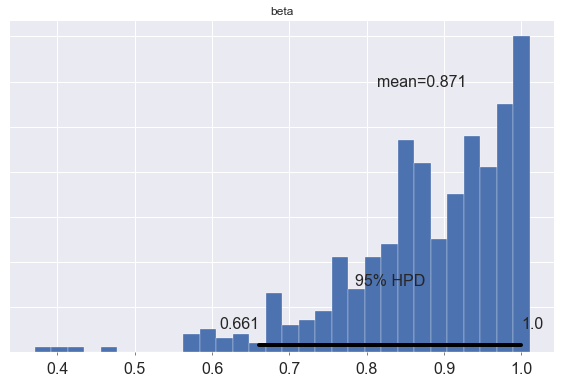

In [36]:
model1 = pm.Model()
with model1:
    prior = pm.Beta('beta',1,1)
    likelihood = pm.Binomial('likelihood',p=prior, n=6,observed=6)
    p1 = pm.sample()
    pm.plot_posterior(p1)
    plt.show()
    

Calculamos el MAP

In [68]:
map_estimate1 = pm.find_MAP(model=model1)
map_estimate1['beta']

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1018.69it/s] 


array(0.9999984620831801)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1361.31it/s]


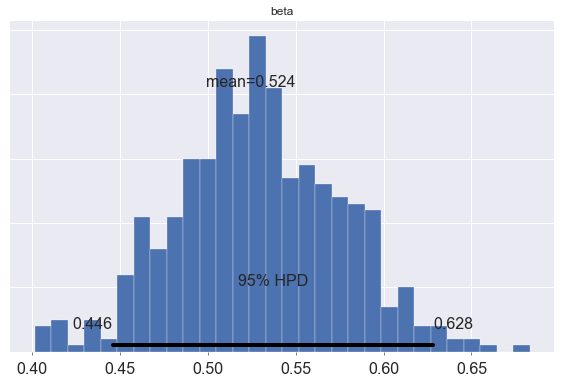

In [63]:
model2 = pm.Model()
with model2:
    prior = pm.Beta('beta',50,50)
    likelihood = pm.Binomial('likelihood',p=prior, n=6,observed=6)
    p2 = pm.sample()
    pm.plot_posterior(p2)
    plt.show()

Calculamos el MAP

In [66]:
map_estimate2 = pm.find_MAP(model=model2)
map_estimate2['beta']

logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1248.99it/s]


array(0.5288461537406147)

# Ejercicio 3

100%|██████████| 500/500 [00:00<00:00, 2650.05it/s]


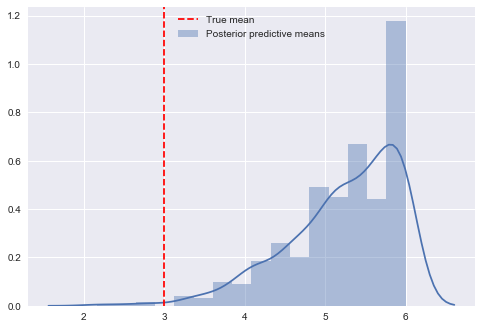

In [60]:
with model1:
    post_pred = pm.sample_ppc(p1, samples=500, size=6)
    plt.figure()
    ax = sns.distplot(post_pred['likelihood'].mean(axis=1), label='Posterior predictive means')
    ax.axvline(3, color='r', ls='--', label='True mean')
    ax.legend()
    plt.show()

100%|██████████| 500/500 [00:00<00:00, 2892.73it/s]


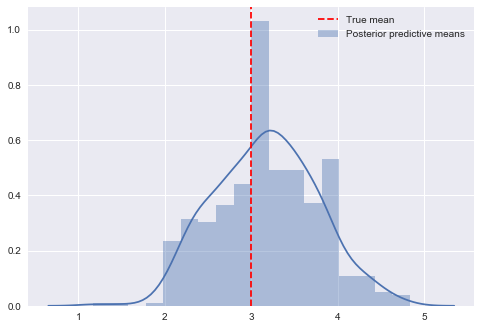

In [59]:
with model2:
    post_pred = pm.sample_ppc(p2, samples=500, size=6)
    plt.figure()
    ax = sns.distplot(post_pred['likelihood'].mean(axis=1), label='Posterior predictive means')
    ax.axvline(3, color='r', ls='--', label='True mean')
    ax.legend()
    plt.show()